In [1]:
import os
os.chdir("drive/My Drive/S9")
!pwd

/content/drive/My Drive/S9


# New Section

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# from resnet import ResNet18
from model import resnet #import ResNet18
import data_loader
import random_dataset_ploot
import training
import torch
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary
trainloader,testloader,classes = data_loader.data_loader_cifar()
nn1 = resnet.ResNet18()



Files already downloaded and verified
Files already downloaded and verified


In [4]:

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
if device == 'cuda':
    net = torch.nn.DataParallel(net)
    cudnn.benchmark = True

model = nn1.to(device)
summary(model, input_size=(3, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,


from torch.optim.lr_scheduler import StepLR
import torch.optim as optim
model =  nn1.to(device)
optimizer = optim.SGD(nn1.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)
scheduler = StepLR(optimizer, step_size=5, gamma=0.01)


EPOCHS = 30
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    training.train(model, device, trainloader, optimizer, epoch)
    # scheduler.step()
    training.test(model, device, testloader)



# New Section

In [5]:
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim
model =  nn1.to(device)
optimizer = optim.SGD(nn1.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
scheduler = StepLR(optimizer, step_size=10, gamma=0.01)


EPOCHS = 30
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    training.train(model, device, trainloader, optimizer, epoch)
    # scheduler.step()
    training.test(model, device, testloader)

  0%|          | 0/1563 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.9815806746482849 Batch_id=1562 Accuracy=45.29: 100%|██████████| 1563/1563 [01:04<00:00, 24.27it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0336, Accuracy: 6259/10000 (62.59%)

EPOCH: 1


Loss=1.7937136888504028 Batch_id=1562 Accuracy=64.74: 100%|██████████| 1563/1563 [01:03<00:00, 24.43it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0263, Accuracy: 7079/10000 (70.79%)

EPOCH: 2


Loss=0.9543832540512085 Batch_id=1562 Accuracy=71.97: 100%|██████████| 1563/1563 [01:04<00:00, 24.35it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0206, Accuracy: 7765/10000 (77.65%)

EPOCH: 3


Loss=0.7967684864997864 Batch_id=1562 Accuracy=75.82: 100%|██████████| 1563/1563 [01:04<00:00, 24.31it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0210, Accuracy: 7785/10000 (77.85%)

EPOCH: 4


Loss=0.3557994067668915 Batch_id=1562 Accuracy=78.74: 100%|██████████| 1563/1563 [01:04<00:00, 24.35it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 7995/10000 (79.95%)

EPOCH: 5


Loss=0.9524286985397339 Batch_id=1562 Accuracy=80.38: 100%|██████████| 1563/1563 [01:04<00:00, 24.28it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0172, Accuracy: 8132/10000 (81.32%)

EPOCH: 6


Loss=0.22456316649913788 Batch_id=1562 Accuracy=81.88: 100%|██████████| 1563/1563 [01:04<00:00, 24.33it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0150, Accuracy: 8379/10000 (83.79%)

EPOCH: 7


Loss=0.19997918605804443 Batch_id=1562 Accuracy=83.26: 100%|██████████| 1563/1563 [01:04<00:00, 24.33it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0147, Accuracy: 8415/10000 (84.15%)

EPOCH: 8


Loss=0.6382704973220825 Batch_id=1562 Accuracy=84.42: 100%|██████████| 1563/1563 [01:04<00:00, 24.28it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0139, Accuracy: 8452/10000 (84.52%)

EPOCH: 9


Loss=0.21098129451274872 Batch_id=1562 Accuracy=85.70: 100%|██████████| 1563/1563 [01:04<00:00, 24.10it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0132, Accuracy: 8592/10000 (85.92%)

EPOCH: 10


Loss=0.6336227655410767 Batch_id=1562 Accuracy=86.17: 100%|██████████| 1563/1563 [01:04<00:00, 24.14it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0122, Accuracy: 8648/10000 (86.48%)

EPOCH: 11


Loss=0.3107110261917114 Batch_id=1562 Accuracy=87.11: 100%|██████████| 1563/1563 [01:04<00:00, 24.12it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0127, Accuracy: 8576/10000 (85.76%)

EPOCH: 12


Loss=0.1106119155883789 Batch_id=1562 Accuracy=87.43: 100%|██████████| 1563/1563 [01:04<00:00, 24.22it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0136, Accuracy: 8543/10000 (85.43%)

EPOCH: 13


Loss=0.9534282684326172 Batch_id=1562 Accuracy=88.00: 100%|██████████| 1563/1563 [01:04<00:00, 24.26it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0118, Accuracy: 8681/10000 (86.81%)

EPOCH: 14


Loss=0.4462316632270813 Batch_id=1562 Accuracy=88.46: 100%|██████████| 1563/1563 [01:04<00:00, 24.25it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0112, Accuracy: 8794/10000 (87.94%)

EPOCH: 15


Loss=0.7790498733520508 Batch_id=1562 Accuracy=88.99: 100%|██████████| 1563/1563 [01:04<00:00, 24.35it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0116, Accuracy: 8732/10000 (87.32%)

EPOCH: 16


Loss=0.22094133496284485 Batch_id=1562 Accuracy=89.05: 100%|██████████| 1563/1563 [01:04<00:00, 24.31it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0116, Accuracy: 8741/10000 (87.41%)

EPOCH: 17


Loss=0.06373956799507141 Batch_id=1562 Accuracy=89.35: 100%|██████████| 1563/1563 [01:03<00:00, 24.47it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0121, Accuracy: 8694/10000 (86.94%)

EPOCH: 18


Loss=0.5931028127670288 Batch_id=1562 Accuracy=89.59: 100%|██████████| 1563/1563 [01:04<00:00, 24.30it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 8821/10000 (88.21%)

EPOCH: 19


Loss=0.94305020570755 Batch_id=1562 Accuracy=89.92: 100%|██████████| 1563/1563 [01:04<00:00, 24.39it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0108, Accuracy: 8827/10000 (88.27%)

EPOCH: 20


Loss=0.20812484622001648 Batch_id=1562 Accuracy=90.18: 100%|██████████| 1563/1563 [01:04<00:00, 24.33it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0108, Accuracy: 8804/10000 (88.04%)

EPOCH: 21


Loss=0.41837066411972046 Batch_id=1562 Accuracy=90.16: 100%|██████████| 1563/1563 [01:04<00:00, 24.24it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0113, Accuracy: 8807/10000 (88.07%)

EPOCH: 22


Loss=0.4822823107242584 Batch_id=1562 Accuracy=90.46: 100%|██████████| 1563/1563 [01:04<00:00, 24.38it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 8801/10000 (88.01%)

EPOCH: 23


Loss=0.853817343711853 Batch_id=1562 Accuracy=90.69: 100%|██████████| 1563/1563 [01:04<00:00, 24.32it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0108, Accuracy: 8794/10000 (87.94%)

EPOCH: 24


Loss=0.10588066279888153 Batch_id=1562 Accuracy=90.78: 100%|██████████| 1563/1563 [01:04<00:00, 24.29it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0124, Accuracy: 8701/10000 (87.01%)

EPOCH: 25


Loss=0.2430088073015213 Batch_id=1562 Accuracy=90.78: 100%|██████████| 1563/1563 [01:04<00:00, 24.27it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8853/10000 (88.53%)

EPOCH: 26


Loss=0.4161451458930969 Batch_id=1562 Accuracy=90.83: 100%|██████████| 1563/1563 [01:04<00:00, 24.29it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0107, Accuracy: 8872/10000 (88.72%)

EPOCH: 27


Loss=0.17962175607681274 Batch_id=1562 Accuracy=91.17: 100%|██████████| 1563/1563 [01:04<00:00, 24.36it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0104, Accuracy: 8901/10000 (89.01%)

EPOCH: 28


Loss=0.812870979309082 Batch_id=1562 Accuracy=91.03: 100%|██████████| 1563/1563 [01:04<00:00, 24.34it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0113, Accuracy: 8831/10000 (88.31%)

EPOCH: 29


Loss=0.5572463870048523 Batch_id=1562 Accuracy=91.35: 100%|██████████| 1563/1563 [01:04<00:00, 24.26it/s]



Test set: Average loss: 0.0113, Accuracy: 8836/10000 (88.36%)



Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 32, 3)
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 32, 3)


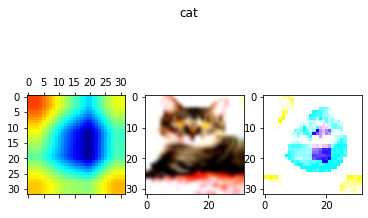

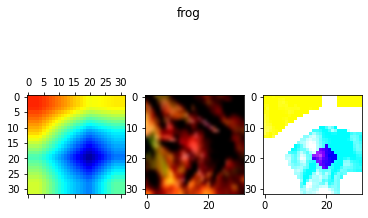

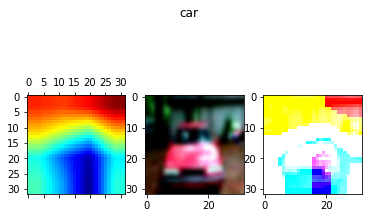

In [10]:

from model import gradcam
import importlib
importlib.reload(gradcam)
importlib.reload(data_loader)
a,testloader,c = trainloader,testloader,classes = data_loader.data_loader_cifar(k=1)
img,_ = next(iter(testloader))
heat_map = gradcam.GradCam_(model,classes,img,device)
xx = iter(testloader)
count=0
while count<3:
  img,_  = next(xx)
  # print(_)
  heat_map = gradcam.GradCam_(model,classes,img,device)
  gradcam.plot1(img,heat_map,classes,_)
  count+=1

